In [41]:
"""PART 1"""
"""Setup and Load Data"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/joestubbs/coe379L-sp25/refs/heads/master/datasets/unit02/california_housing.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0


In [42]:
"""Shape and Size of the Data"""

print("Shape of dataset:", df.shape)

Shape of dataset: (20634, 9)


In [43]:
"""Data Types, Duplicates, and Cleaning"""

# Check data types
print(df.dtypes)

# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates if any
df = df.drop_duplicates()

MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median      int64
dtype: object
Number of duplicate rows: 0


In [44]:
"""Descriptive Statistics and Anomalies"""
# Get statistical summary
desc = df.describe()
print(desc)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20634.000000  20634.000000  20634.000000  20634.000000  20634.000000   
mean       3.870795     28.640399      5.429171      1.096628   1425.398081   
std        1.899796     12.584629      2.474393      0.473929   1132.137403   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563925     18.000000      4.440930      1.006067    787.000000   
50%        3.534950     29.000000      5.229190      1.048780   1166.000000   
75%        4.743550     37.000000      6.052381      1.099499   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  price_above_median  
count  20634.000000  20634.000000  20634.000000        20634.000000  
mean       3.070449     35.631722   -119.569594            0.500000  
std       10.387501      2.135738      2.003457            0.500012  
min     

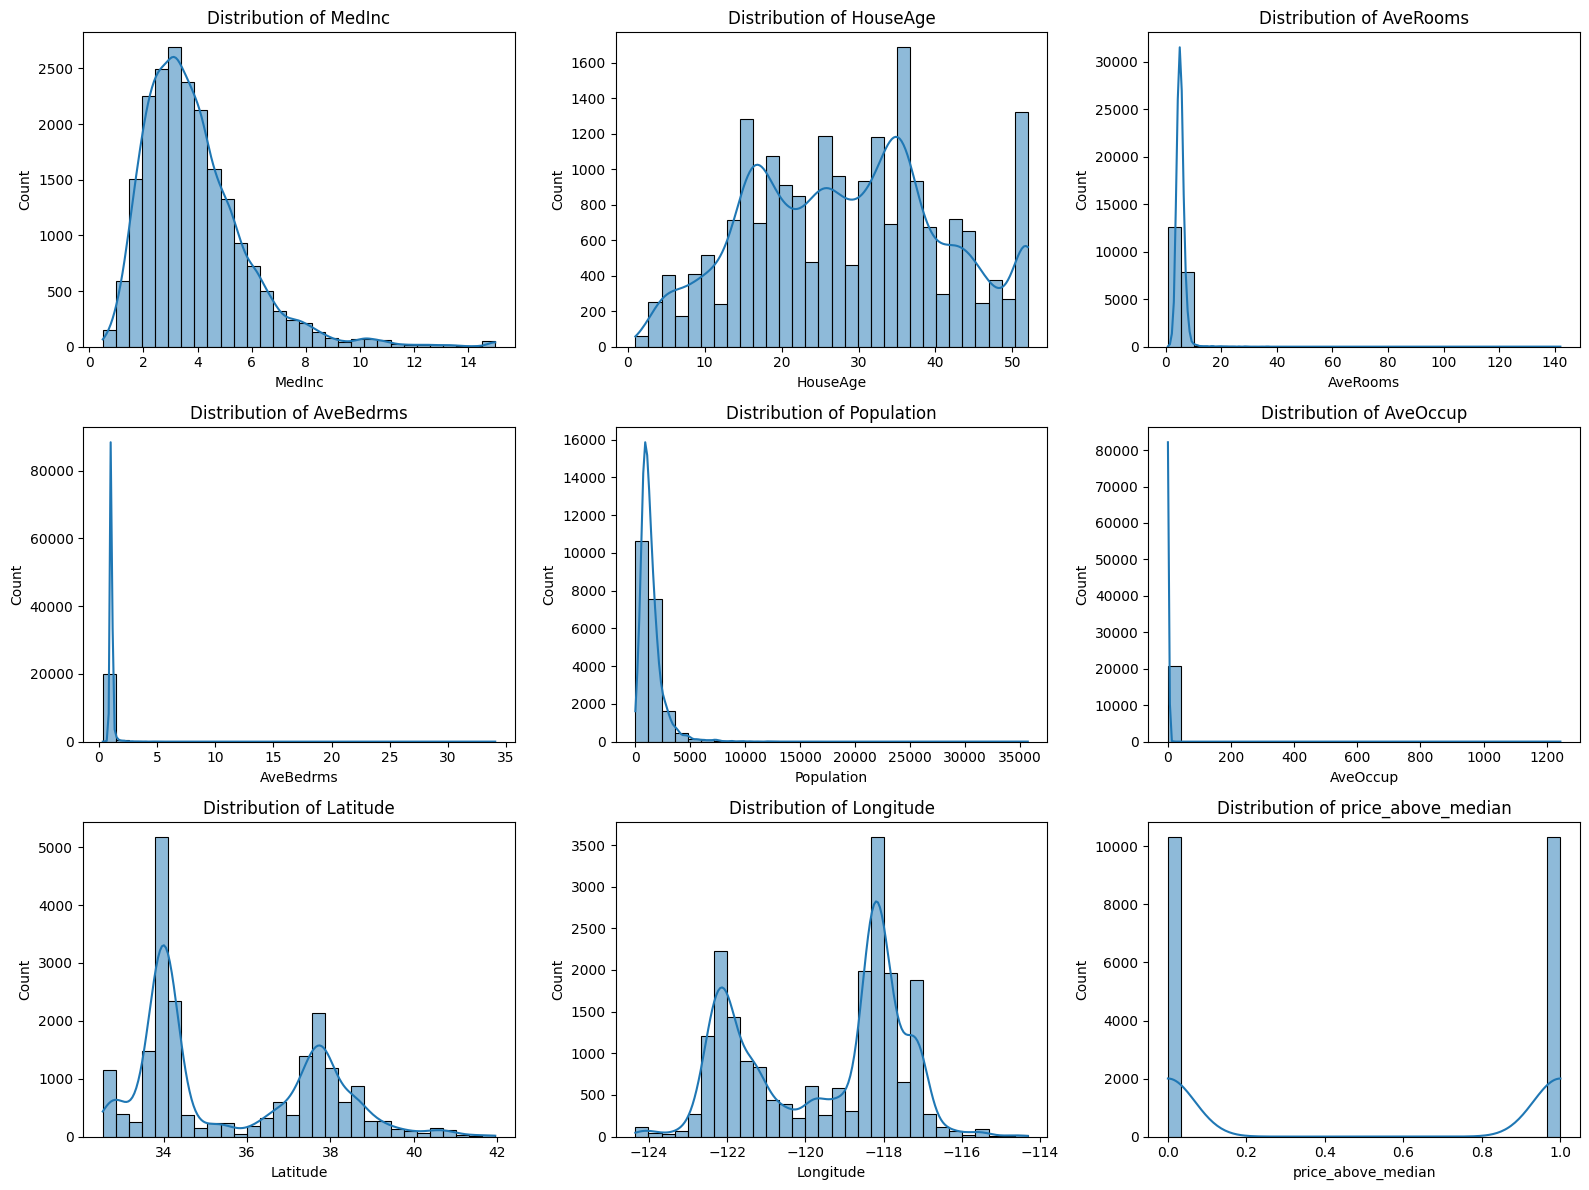

In [45]:
"""Univariate Visualization"""

# Set up a layout for visualizations
plt.figure(figsize=(16, 12))

# Histogram for each numerical feature
for idx, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, idx)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [46]:
"""PART 02"""
"""Setup"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the data again
url = "https://raw.githubusercontent.com/joestubbs/coe379L-sp25/refs/heads/master/datasets/unit02/california_housing.csv"
df = pd.read_csv(url)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Separate features and target
X = df.drop('price_above_median', axis=1)
y = df['price_above_median']

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [47]:
"""Standardization (for KNN especially)"""

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best K: {'n_neighbors': 9}
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      2064
           1       0.83      0.84      0.83      2063

    accuracy                           0.83      4127
   macro avg       0.83      0.83      0.83      4127
weighted avg       0.83      0.83      0.83      4127



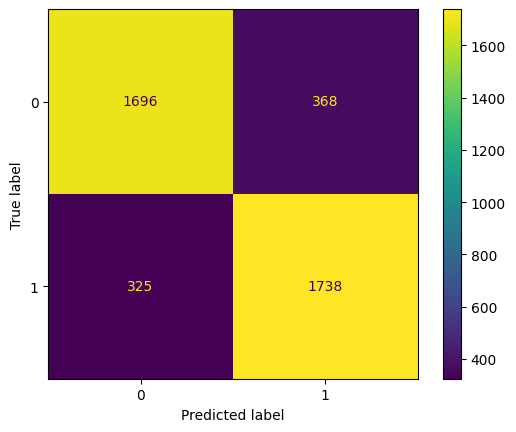

In [48]:
"""K-Nearest Neighbors (KNN)"""
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter tuning for K
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
print("Best K:", knn.best_params_)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

Best Depth: {'max_depth': 10}
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      2064
           1       0.83      0.87      0.85      2063

    accuracy                           0.85      4127
   macro avg       0.85      0.85      0.85      4127
weighted avg       0.85      0.85      0.85      4127



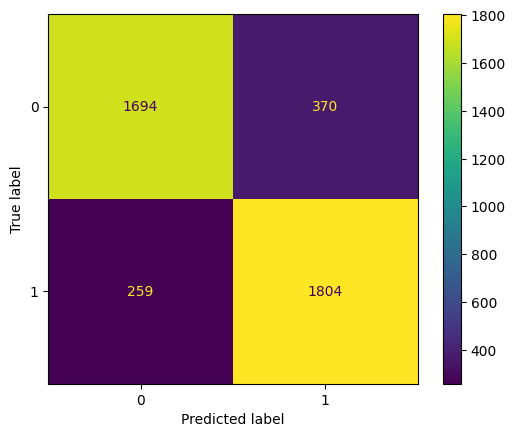

In [49]:
"""Decision Tree Classifier"""

from sklearn.tree import DecisionTreeClassifier

tree_params = {'max_depth': [3, 5, 10, 15, None]}
tree = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print("Best Depth:", tree.best_params_)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)

Best Params: {'max_depth': None, 'n_estimators': 200}
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2064
           1       0.89      0.89      0.89      2063

    accuracy                           0.89      4127
   macro avg       0.89      0.89      0.89      4127
weighted avg       0.89      0.89      0.89      4127



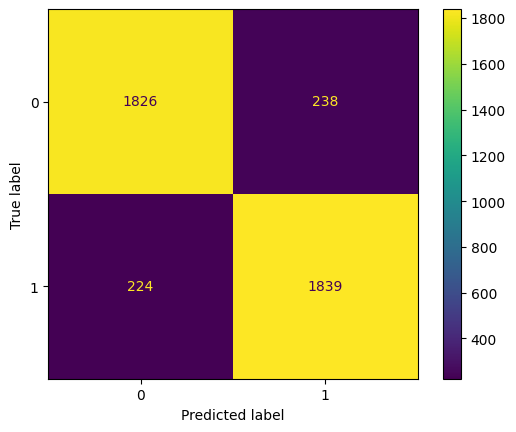

In [50]:
"""Random Forest Classifier"""

from sklearn.ensemble import RandomForestClassifier

rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Best Params:", rf.best_params_)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

Best Params: {'n_estimators': 200}
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2064
           1       0.86      0.88      0.87      2063

    accuracy                           0.87      4127
   macro avg       0.87      0.87      0.87      4127
weighted avg       0.87      0.87      0.87      4127



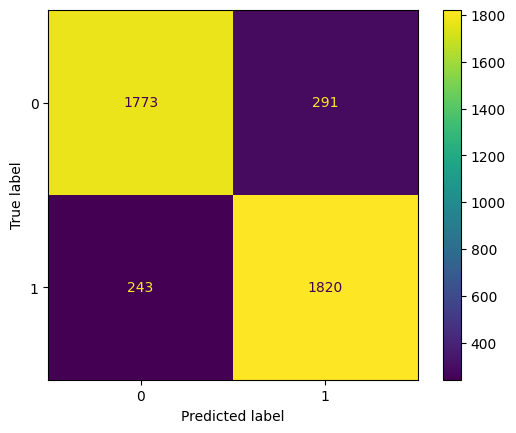

In [54]:
"""AdaBoost Classifier"""

from sklearn.ensemble import AdaBoostClassifier

ada_params = {'n_estimators': [50, 100, 200]}
ada = GridSearchCV(AdaBoostClassifier(random_state=42), ada_params, cv=5)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
print("Best Params:", ada.best_params_)
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ada)

In [56]:
"""Compare Performance of All Models"""

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "KNN": knn,
    "Decision Tree": tree,
    "Random Forest": rf,
    "AdaBoost": ada
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled if name == "KNN" else X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print()

--- KNN ---
Accuracy: 0.8320814150714805
Precision: 0.8252611585944919
Recall: 0.842462433349491
F1 Score: 0.8337730870712402

--- Decision Tree ---
Accuracy: 0.8475890477344318
Precision: 0.8298068077276909
Recall: 0.8744546776539021
F1 Score: 0.8515459051215483

--- Random Forest ---
Accuracy: 0.8880542767143204
Precision: 0.8854116514203177
Recall: 0.8914202617547261
F1 Score: 0.8884057971014493

--- AdaBoost ---
Accuracy: 0.8706081899685001
Precision: 0.8621506395073425
Recall: 0.8822103732428502
F1 Score: 0.872065165309056

